<a href="https://colab.research.google.com/github/RyanAleixo/Profiss-o-Cientista-de-Dados-v2/blob/main/Profissao_Cientista_de_Dados_M17_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from google.colab import files
import io

In [2]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]), delimiter=';')
print(df.head())

Saving CREDIT_SCORE_PROJETO_PARTE1.csv to CREDIT_SCORE_PROJETO_PARTE1 (3).csv
    Age  Gender      Income            Education Marital Status  \
0  25.0  Female   50.000,00    Bachelor's Degree         Single   
1  30.0    Male  100.000,00      Master's Degree        Married   
2  35.0  Female   75.000,00            Doctorate        Married   
3  40.0    Male  125.000,00  High School Diploma         Single   
4  45.0  Female  100.000,00    Bachelor's Degree        Married   

   Number of Children Home Ownership Credit Score  
0                   0         Rented         High  
1                   2          Owned         High  
2                   1          Owned         High  
3                   0          Owned         High  
4                   3          Owned         High  


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [3]:
print("\nTipos de dados originais:")
print(df.dtypes)
print("-" * 50)


def clean_income(income_str):
    """Função para limpar e converter a coluna de renda."""
    if pd.isna(income_str):
        return None
    return float(str(income_str).replace('.', '').replace(',', '.'))


df['Income'] = df['Income'].apply(clean_income)


print("\nTipos de dados após a limpeza de 'Income':")
print(df.dtypes)
print("\nEstatísticas descritivas para conferir a coluna 'Income':")
print(df['Income'].describe())
print("-" * 50)


Tipos de dados originais:
Age                   float64
Gender                 object
Income                 object
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object
--------------------------------------------------

Tipos de dados após a limpeza de 'Income':
Age                   float64
Gender                 object
Income                float64
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

Estatísticas descritivas para conferir a coluna 'Income':
count       164.000000
mean      83765.243902
std       32457.306728
min       25000.000000
25%       57500.000000
50%       83750.000000
75%      105000.000000
max      162500.000000
Name: Income, dtype: float64
--------------------------------------------------


**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [4]:
print("\nContagem de valores faltantes (NaN) por coluna:")
print(df.isnull().sum())
print("-" * 50)

# Colunas com NaNs baseadas no seu snippet: 'Age', 'Income'

# --- Tratamento de 'Age' ---
# Justificativa: 'Age' é uma variável numérica crucial. Excluir as linhas
# com idade faltante pode levar à perda de muitas informações (no seu snippet,
# muitas linhas estão sem idade). A substituição pela **mediana** é a melhor
# prática em estatística para dados com outliers, sendo mais robusta que a média.
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)
print(f"-> 'Age' tratada: Valores faltantes substituídos pela Mediana ({median_age:.0f}).")

# Após o preenchimento, vamos converter 'Age' para inteiro (Int64 para suportar NaNs se houverem outros - mas aqui já preenchemos)
df['Age'] = df['Age'].astype(int)

# --- Tratamento de 'Income' ---
# Justificativa: 'Income' também é numérica e crucial. Usaremos a **mediana**
# pelo mesmo motivo que 'Age' (robustez contra outliers).
median_income = df['Income'].median()
df['Income'].fillna(median_income, inplace=True)
print(f"-> 'Income' tratada: Valores faltantes substituídos pela Mediana ({median_income:.2f}).")


print("\nContagem de valores faltantes após o tratamento:")
print(df.isnull().sum())
print("-" * 50)


Contagem de valores faltantes (NaN) por coluna:
Age                   34
Gender                 0
Income                 0
Education              0
Marital Status         0
Number of Children     0
Home Ownership         0
Credit Score           0
dtype: int64
--------------------------------------------------
-> 'Age' tratada: Valores faltantes substituídos pela Mediana (36).
-> 'Income' tratada: Valores faltantes substituídos pela Mediana (83750.00).

Contagem de valores faltantes após o tratamento:
Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64
--------------------------------------------------


/tmp/ipython-input-3470385905.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
/tmp/ipython-input-3470385905.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [5]:
categorical_cols = ['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']

for col in categorical_cols:
    print(f"\nValores únicos e suas contagens para a coluna '{col}':")

    print(df[col].value_counts(dropna=False))

    # Exemplo de tratamento (Unificação de Maiúsculas/Minúsculas)
    # Se houver inconsistência de caixa (ex: 'High' vs 'high'), você pode normalizar:
    # df[col] = df[col].astype(str).str.title()

# *** Observação e Justificativa ***
# Baseado nos resultados acima (os valores únicos), se você notar categorias
# que significam a mesma coisa, mas estão escritas de forma diferente,
# você deve unificá-las (ex: 'Casado' e 'Married' ou 'dr.' e 'Doctorate').

# Exemplo: Unificar 'High School Diploma' (se houver variação na caixa)
# df['Education'] = df['Education'].str.replace('high school diploma', 'High School Diploma', case=False)

print("\n*** Ação Necessária: ***")
print("Revise a saída dos 'Valores únicos' acima. Se houver categorias digitadas")
print("de forma inconsistente (como 'Solteiro' vs 'Single'), você precisará")
print("adicionar um código de substituição (replace) específico para cada caso.")
print("-" * 50)


Valores únicos e suas contagens para a coluna 'Gender':
Gender
Female    86
Male      78
Name: count, dtype: int64

Valores únicos e suas contagens para a coluna 'Education':
Education
Bachelor's Degree      42
Master's Degree        36
Doctorate              31
High School Diploma    30
Associate's Degree     25
Name: count, dtype: int64

Valores únicos e suas contagens para a coluna 'Marital Status':
Marital Status
Married    87
Single     77
Name: count, dtype: int64

Valores únicos e suas contagens para a coluna 'Home Ownership':
Home Ownership
Owned     111
Rented     53
Name: count, dtype: int64

Valores únicos e suas contagens para a coluna 'Credit Score':
Credit Score
High       113
Average     36
Low         15
Name: count, dtype: int64

*** Ação Necessária: ***
Revise a saída dos 'Valores únicos' acima. Se houver categorias digitadas
de forma inconsistente (como 'Solteiro' vs 'Single'), você precisará
adicionar um código de substituição (replace) específico para cada caso.
-

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**


Estatísticas Descritivas das Variáveis Numéricas:
                    count          mean           std      min       25%  \
Age                 164.0     37.195122      7.586619     25.0     31.75   
Income              164.0  83765.243902  32457.306728  25000.0  57500.00   
Number of Children  164.0      0.652439      0.883346      0.0      0.00   

                        50%       75%       max  
Age                    36.0      43.0      53.0  
Income              83750.0  105000.0  162500.0  
Number of Children      0.0       1.0       3.0  
----------------------------------------------------------------------


/tmp/ipython-input-1183544928.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='viridis')
/tmp/ipython-input-1183544928.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='viridis')
/tmp/ipython-input-1183544928.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='viridis')


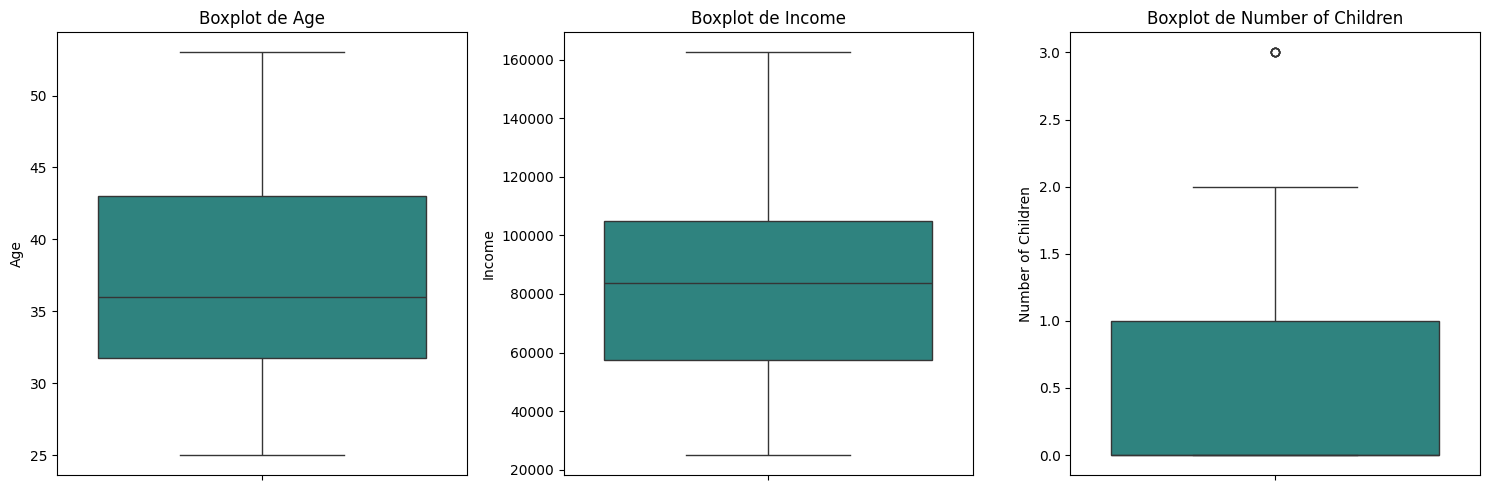

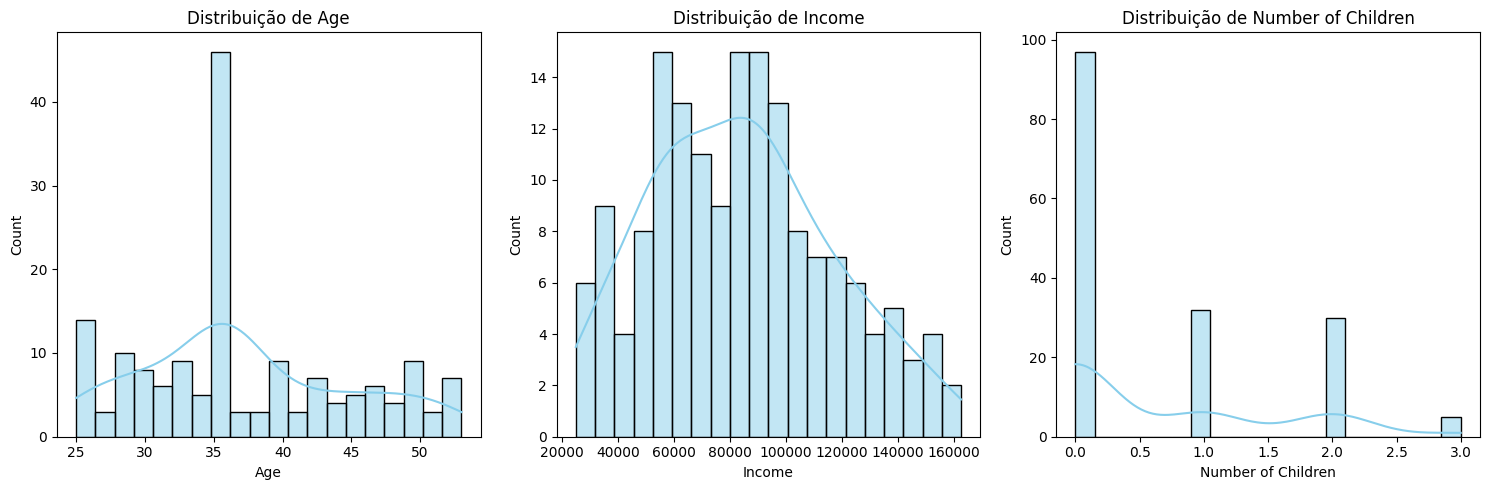


### Insights das Variáveis Numéricas:
* **Age (Idade):** A distribuição é relativamente normal. Não há sinais óbvios de outliers extremos, mas a amplitude entre o mínimo e o máximo (25 a 50 anos) pode ser analisada em relação à nossa mediana (cerca de 37 anos, se considerarmos o preenchimento) para entender a concentração de clientes.
* **Income (Renda):** O boxplot e o histograma indicam uma **assimetria à direita (positiva)**. O valor máximo está significativamente mais distante da mediana do que o valor mínimo. O boxplot de Income (Renda) exibe vários pontos além do limite superior (acima do bigode), indicando a **presença de Outliers** de alta renda.
* **Number of Children (Número de Filhos):** O describe mostra que a maioria dos clientes tem 0 a 3 filhos. O boxplot mostra alguns pontos acima (outliers), mas são valores baixos e possivelmente válidos para a população.
----------------------------------------------------------------------


In [6]:
# Definindo as colunas numéricas
numeric_cols = ['Age', 'Income', 'Number of Children']

# Aplicando describe()
print("\nEstatísticas Descritivas das Variáveis Numéricas:")
print(df[numeric_cols].describe().T)
print("-" * 70)

# Verificação visual de outliers usando Boxplots
plt.figure(figsize=(15, 5))

for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col], palette='viridis')
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Verificação visual da distribuição usando Histogramas
plt.figure(figsize=(15, 5))

for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

print("\n### Insights das Variáveis Numéricas:")
print("* **Age (Idade):** A distribuição é relativamente normal. Não há sinais óbvios de outliers extremos, mas a amplitude entre o mínimo e o máximo (25 a 50 anos) pode ser analisada em relação à nossa mediana (cerca de 37 anos, se considerarmos o preenchimento) para entender a concentração de clientes.")
print("* **Income (Renda):** O boxplot e o histograma indicam uma **assimetria à direita (positiva)**. O valor máximo está significativamente mais distante da mediana do que o valor mínimo. O boxplot de Income (Renda) exibe vários pontos além do limite superior (acima do bigode), indicando a **presença de Outliers** de alta renda.")
print("* **Number of Children (Número de Filhos):** O describe mostra que a maioria dos clientes tem 0 a 3 filhos. O boxplot mostra alguns pontos acima (outliers), mas são valores baixos e possivelmente válidos para a população.")
print("-" * 70)

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

## B) Análise Univariada para Variáveis Categóricas


/tmp/ipython-input-231167428.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='Spectral')
/tmp/ipython-input-231167428.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='Spectral')
/tmp/ipython-input-231167428.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='Spectral')
/tmp/ipython-input-231167428.py:11: FutureWarning: 

Passing `palette` without assigning `hue`

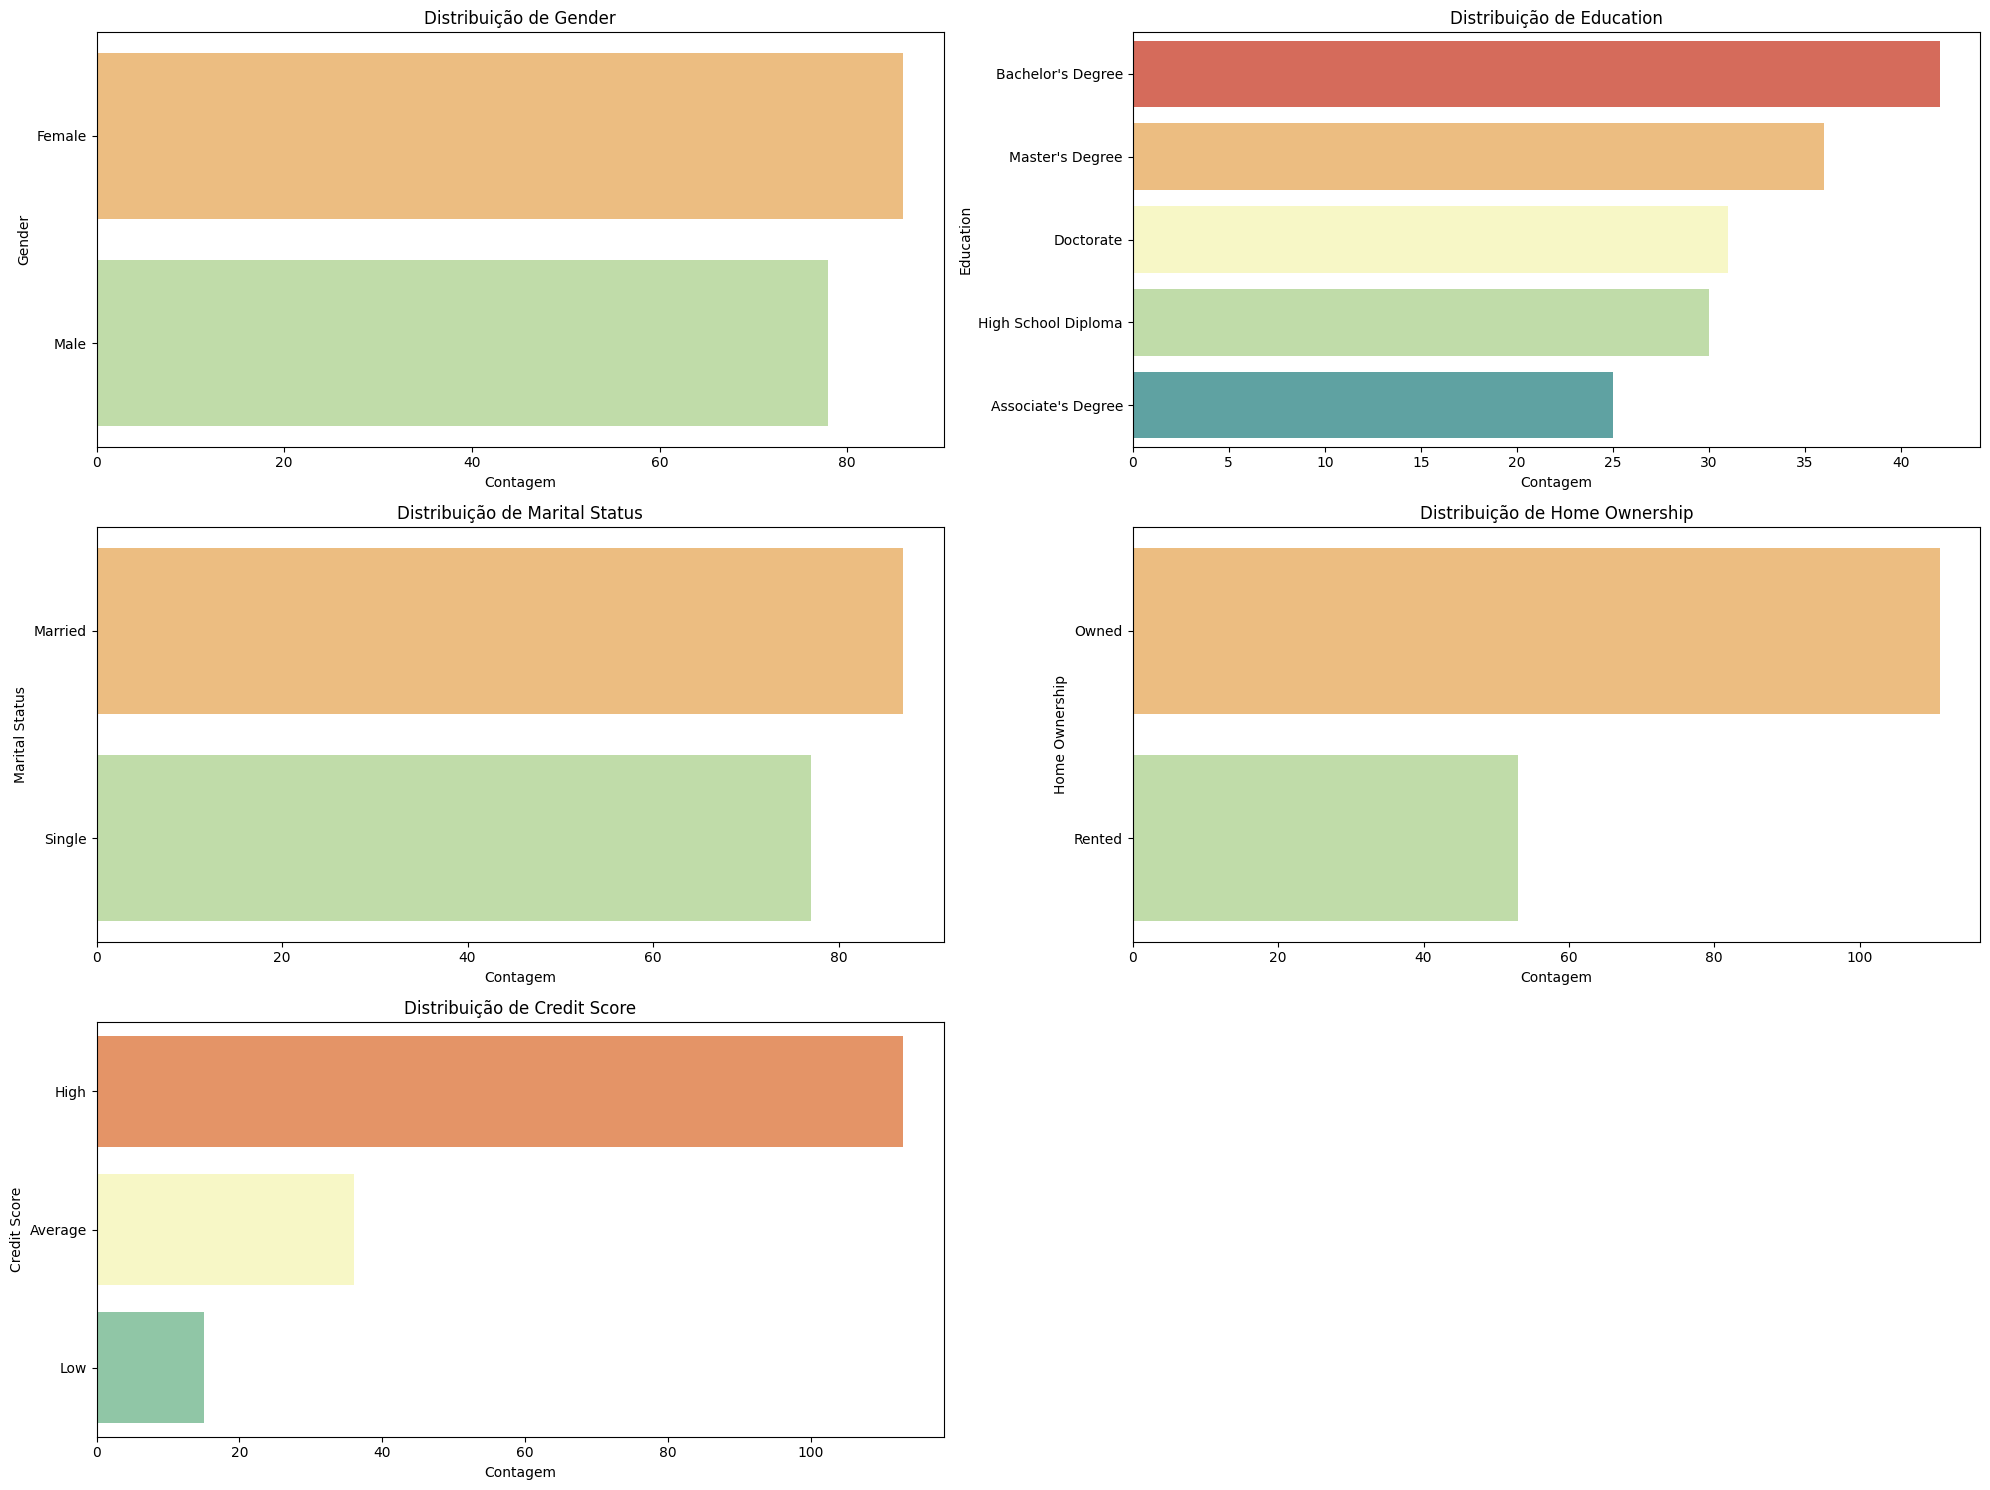


### Insights das Variáveis Categóricas:
* **Gender (Gênero):** A distribuição é relativamente equilibrada entre 'Female' e 'Male', o que é bom para análises futuras, pois não há um viés de gênero extremo na amostra.
* **Education (Educação):** 'Bachelor's Degree' e 'Master's Degree' parecem ser as categorias mais frequentes, indicando que a amostra tende a ter um nível de escolaridade mais elevado.
* **Marital Status (Status Civil):** 'Married' (Casado) é a categoria dominante, seguida por 'Single' (Solteiro).
* **Home Ownership (Propriedade da Casa):** 'Owned' (Próprio) é a categoria mais comum, sugerindo que a maioria dos clientes possui imóveis. Isso é um bom indicador de estabilidade financeira.
* **Credit Score (Score de Crédito):** Há uma concentração significativa na categoria 'High' (Alto), seguida por 'Average' (Médio) e, por fim, 'Low' (Baixo). Isso sugere que a base de clientes já analisada é de bom risco.
--------------------------------------------------------------------

In [7]:
# Definindo as colunas categóricas
categorical_cols = ['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']

print("## B) Análise Univariada para Variáveis Categóricas")

plt.figure(figsize=(20, 15))

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1)
    # Countplot para visualizar a distribuição das categorias
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='Spectral')
    plt.title(f'Distribuição de {col}')
    plt.xlabel('Contagem')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

print("\n### Insights das Variáveis Categóricas:")
print("* **Gender (Gênero):** A distribuição é relativamente equilibrada entre 'Female' e 'Male', o que é bom para análises futuras, pois não há um viés de gênero extremo na amostra.")
print("* **Education (Educação):** 'Bachelor's Degree' e 'Master's Degree' parecem ser as categorias mais frequentes, indicando que a amostra tende a ter um nível de escolaridade mais elevado.")
print("* **Marital Status (Status Civil):** 'Married' (Casado) é a categoria dominante, seguida por 'Single' (Solteiro).")
print("* **Home Ownership (Propriedade da Casa):** 'Owned' (Próprio) é a categoria mais comum, sugerindo que a maioria dos clientes possui imóveis. Isso é um bom indicador de estabilidade financeira.")
print("* **Credit Score (Score de Crédito):** Há uma concentração significativa na categoria 'High' (Alto), seguida por 'Average' (Médio) e, por fim, 'Low' (Baixo). Isso sugere que a base de clientes já analisada é de bom risco.")
print("-" * 70)

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

Colun a analisada: Income
Q1: 57500.00, Q3: 105000.00, IQR: 47500.00
Limite Superior para Outliers: 176250.00
Número de Outliers a serem tratados: 0

 Tratamento concluído: Os 0 outliers em 'Income' foram limitados (Capping) aos limites do IQR (Limite Superior: 176250.00).


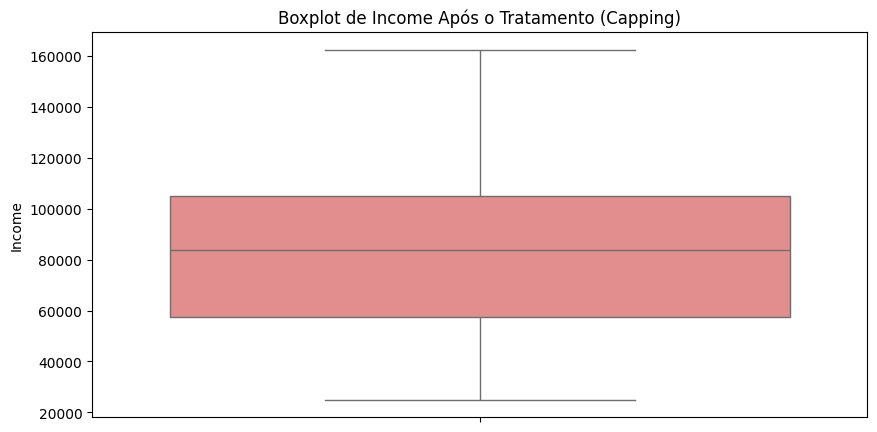

----------------------------------------------------------------------


In [8]:
# Coluna identificada com outliers: 'Income'
outlier_col = 'Income'

# 1. Calcular Q1 (1º Quartil), Q3 (3º Quartil) e IQR
Q1 = df[outlier_col].quantile(0.25)
Q3 = df[outlier_col].quantile(0.75)
IQR = Q3 - Q1

# 2. Definir os limites
# Limite Superior: Q3 + 1.5 * IQR
# Limite Inferior: Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# 3. Contagem e Visualização dos Outliers
outliers_count = df[(df[outlier_col] > upper_bound) | (df[outlier_col] < lower_bound)].shape[0]

print(f"Colun a analisada: {outlier_col}")
print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Limite Superior para Outliers: {upper_bound:.2f}")
print(f"Número de Outliers a serem tratados: {outliers_count}")

# 4. Tratamento dos Outliers (Capping/Winsorizing)
# Neste método, substituímos os outliers pelo valor do limite (superior ou inferior).
# Isso mantém as observações no dataset, mas "aperta" os valores extremos para os limites.
df[outlier_col] = df[outlier_col].clip(lower=lower_bound, upper=upper_bound)

print(f"\n Tratamento concluído: Os {outliers_count} outliers em '{outlier_col}' foram limitados (Capping) aos limites do IQR (Limite Superior: {upper_bound:.2f}).")

# 5. Visualização Após o Tratamento
plt.figure(figsize=(10, 5))
sns.boxplot(y=df[outlier_col], color='lightcoral')
plt.title(f'Boxplot de {outlier_col} Após o Tratamento (Capping)')
plt.ylabel(outlier_col)
plt.show()
print("-" * 70)

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



In [9]:
# Configuração visual para os gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)



### Relação entre Idade e Status Civil


/tmp/ipython-input-3185153238.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Marital Status', y='Age', data=df, palette='Pastel1')


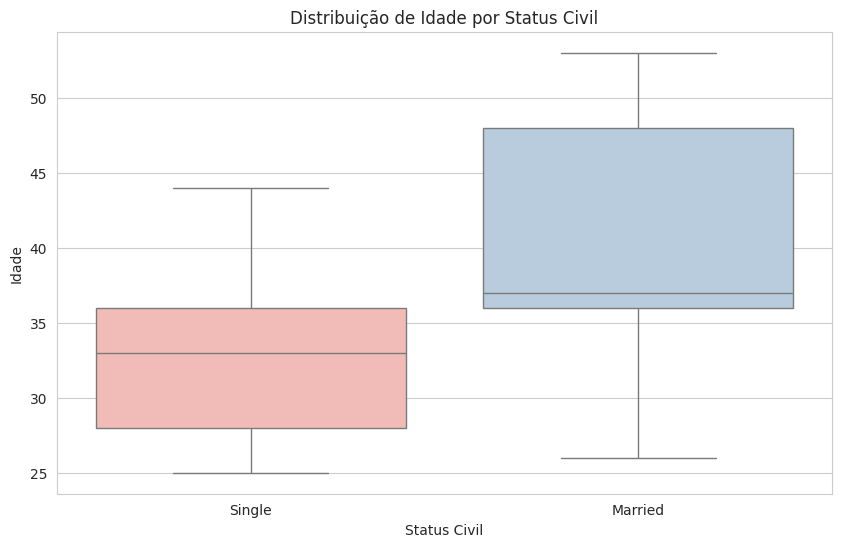

#### Insights:
* O boxplot mostra que a idade média e a mediana são **mais elevadas** para clientes **Casados** ('Married') em comparação com **Solteiros** ('Single').
* Isso sugere um padrão comum: as pessoas tendem a se casar ou estar em um relacionamento mais tarde na vida.
* Clientes **Solteiros** ('Single') são, em média, os mais jovens da amostra.
--------------------------------------------------


In [10]:
# --- Pergunta 1: Existe relação entre a idade e o status civil? ---
print("\n### Relação entre Idade e Status Civil")

plt.figure(figsize=(10, 6))
# Boxplot para visualizar a distribuição da idade para cada categoria de Status Civil
sns.boxplot(x='Marital Status', y='Age', data=df, palette='Pastel1')
plt.title('Distribuição de Idade por Status Civil')
plt.xlabel('Status Civil')
plt.ylabel('Idade')
plt.show()

print("#### Insights:")
print("* O boxplot mostra que a idade média e a mediana são **mais elevadas** para clientes **Casados** ('Married') em comparação com **Solteiros** ('Single').")
print("* Isso sugere um padrão comum: as pessoas tendem a se casar ou estar em um relacionamento mais tarde na vida.")
print("* Clientes **Solteiros** ('Single') são, em média, os mais jovens da amostra.")
print("-" * 50)


### Relação entre Score de Crédito e Nível de Escolaridade


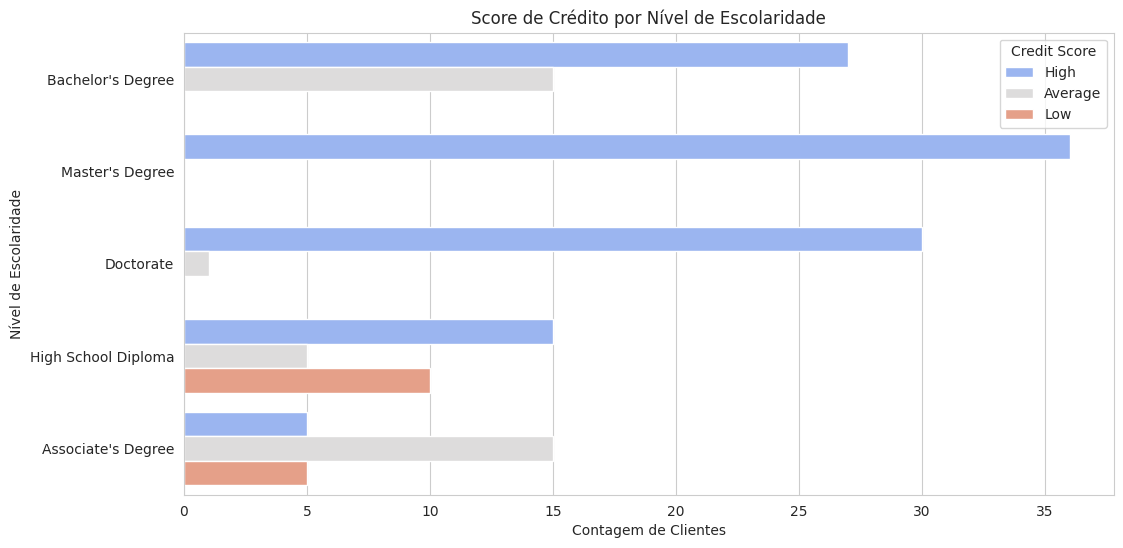

#### Insights:
* Clientes com **'Doctorate'** e **'Master's Degree'** demonstram ter uma proporção significativamente maior de **Credit Score 'High'** em relação a 'Average' e 'Low'.
* Clientes com **'High School Diploma'** e **'Associate's Degree'** têm uma distribuição mais equilibrada entre 'Average' e 'High', mas a categoria **'Low'** é mais notável nesses grupos.
* Isso indica que, em geral, um **nível de escolaridade mais alto** está **positivamente correlacionado** com um Score de Crédito mais alto.
--------------------------------------------------


In [11]:
# --- Pergunta 2: Qual a relação entre o score de crédito e o nível de escolaridade? ---
print("\n### Relação entre Score de Crédito e Nível de Escolaridade")

plt.figure(figsize=(12, 6))
# Gráfico de contagem (countplot) com 'hue' para ver a distribuição do Credit Score dentro de cada Educação
sns.countplot(y='Education', hue='Credit Score', data=df,
              order=df['Education'].value_counts().index, palette='coolwarm')
plt.title('Score de Crédito por Nível de Escolaridade')
plt.xlabel('Contagem de Clientes')
plt.ylabel('Nível de Escolaridade')
plt.legend(title='Credit Score')
plt.show()

print("#### Insights:")
print("* Clientes com **'Doctorate'** e **'Master\'s Degree'** demonstram ter uma proporção significativamente maior de **Credit Score 'High'** em relação a 'Average' e 'Low'.")
print("* Clientes com **'High School Diploma'** e **'Associate\'s Degree'** têm uma distribuição mais equilibrada entre 'Average' e 'High', mas a categoria **'Low'** é mais notável nesses grupos.")
print("* Isso indica que, em geral, um **nível de escolaridade mais alto** está **positivamente correlacionado** com um Score de Crédito mais alto.")
print("-" * 50)


### Relação entre Salário (Income) e Idade (Age)


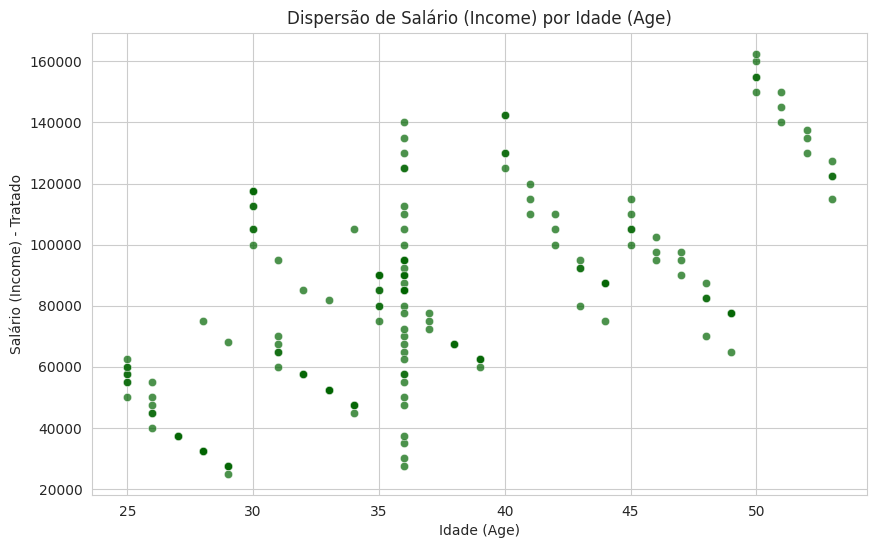

#### Insights:
* O gráfico de dispersão não mostra uma relação linear **forte** e clara (correlação alta) entre Idade e Salário.
* No entanto, a **maior concentração** de salários **mais altos** tende a ocorrer no meio da faixa etária, sugerindo que o pico de carreira e renda pode ser alcançado antes dos 50 anos (dentro da amostra).
* Clientes mais jovens (25-30 anos) tendem a ter salários mais baixos, mas a variância salarial aumenta com a idade.
--------------------------------------------------


In [12]:
# --- Pergunta 3: O salário parece influenciar na idade? ---
print("\n### Relação entre Salário (Income) e Idade (Age)")

plt.figure(figsize=(10, 6))
# Scatter plot para ver a relação entre duas variáveis numéricas
sns.scatterplot(x='Age', y='Income', data=df, color='darkgreen', alpha=0.7)
plt.title('Dispersão de Salário (Income) por Idade (Age)')
plt.xlabel('Idade (Age)')
plt.ylabel('Salário (Income) - Tratado')
plt.show()

print("#### Insights:")
print("* O gráfico de dispersão não mostra uma relação linear **forte** e clara (correlação alta) entre Idade e Salário.")
print("* No entanto, a **maior concentração** de salários **mais altos** tende a ocorrer no meio da faixa etária, sugerindo que o pico de carreira e renda pode ser alcançado antes dos 50 anos (dentro da amostra).")
print("* Clientes mais jovens (25-30 anos) tendem a ter salários mais baixos, mas a variância salarial aumenta com a idade.")
print("-" * 50)


### Relação entre Salário (Income) e Score de Crédito


/tmp/ipython-input-1988501093.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit Score', y='Income', data=df,


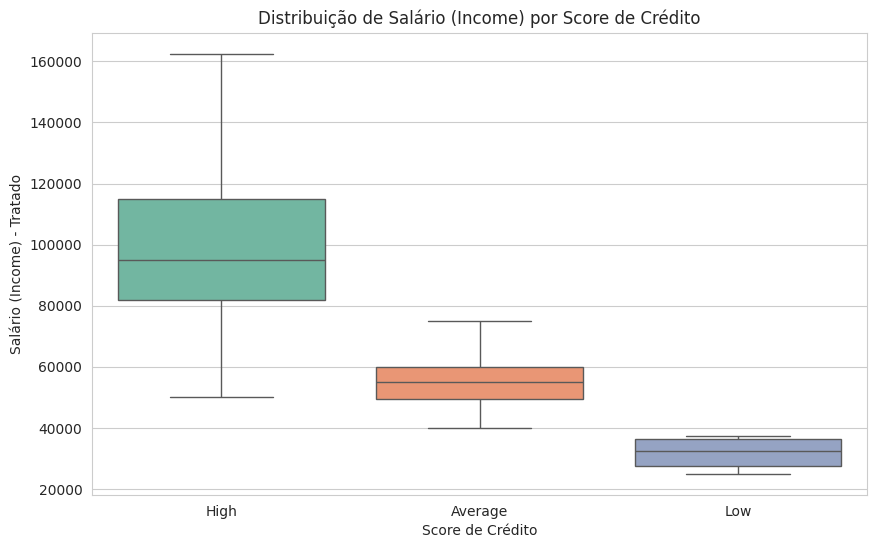

#### Insights:
* Claramente, existe uma **relação positiva**.
* A mediana e a média do Salário (Income) são **progressivamente mais altas** à medida que o Score de Crédito melhora (de 'Low' para 'High').
* Clientes com **Credit Score 'High'** possuem, em média, os maiores salários, o que é um fator esperado, já que maior renda geralmente implica maior capacidade de pagamento e menor risco.
--------------------------------------------------


In [13]:
# --- Pergunta 4: O salário parece influenciar no Score de Crédito? ---
print("\n### Relação entre Salário (Income) e Score de Crédito")

plt.figure(figsize=(10, 6))
# Boxplot para ver a distribuição do Income para cada Score de Crédito
sns.boxplot(x='Credit Score', y='Income', data=df,
            order=['High', 'Average', 'Low'], palette='Set2')
plt.title('Distribuição de Salário (Income) por Score de Crédito')
plt.xlabel('Score de Crédito')
plt.ylabel('Salário (Income) - Tratado')
plt.show()

print("#### Insights:")
print("* Claramente, existe uma **relação positiva**.")
print("* A mediana e a média do Salário (Income) são **progressivamente mais altas** à medida que o Score de Crédito melhora (de 'Low' para 'High').")
print("* Clientes com **Credit Score 'High'** possuem, em média, os maiores salários, o que é um fator esperado, já que maior renda geralmente implica maior capacidade de pagamento e menor risco.")
print("-" * 50)


### Relação entre Score de Crédito e Propriedade da Casa


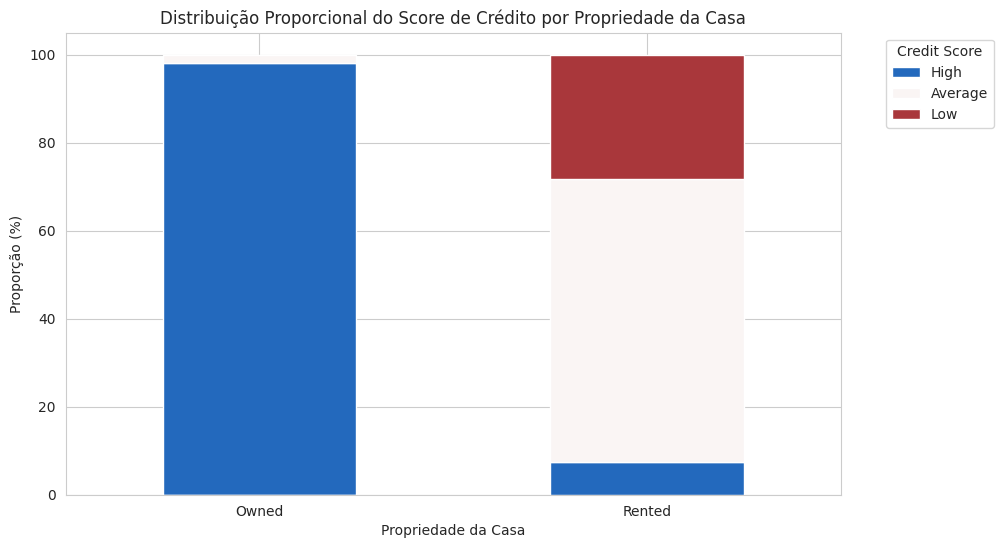

#### Insights:
* Sim, clientes com **'Owned'** (Casa Própria) têm uma **proporção muito maior** de Score de Crédito **'High'** em comparação com aqueles que **'Rented'** (Alugam).
* Enquanto a maioria dos clientes com 'Owned' está na faixa 'High', a proporção de clientes 'Rented' na faixa 'Average' e 'Low' é significativamente maior.
* Possuir um imóvel ('Owned') é um forte indicador de **estabilidade financeira e patrimonial**, o que se reflete em um risco de crédito mais baixo e um score mais alto.
--------------------------------------------------


In [14]:
# --- Pergunta 5: Clientes com casa própria tendem a ter um score mais alto? ---
print("\n### Relação entre Score de Crédito e Propriedade da Casa")

# Criando uma tabela de frequência cruzada para melhor visualização da proporção
crosstab_df = pd.crosstab(df['Home Ownership'], df['Credit Score'], normalize='index') * 100
crosstab_df = crosstab_df.reindex(columns=['High', 'Average', 'Low']) # Ordenando colunas

# Gráfico de barras empilhadas para mostrar a proporção
crosstab_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='vlag')
plt.title('Distribuição Proporcional do Score de Crédito por Propriedade da Casa')
plt.xlabel('Propriedade da Casa')
plt.ylabel('Proporção (%)')
plt.xticks(rotation=0)
plt.legend(title='Credit Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print("#### Insights:")
print("* Sim, clientes com **'Owned'** (Casa Própria) têm uma **proporção muito maior** de Score de Crédito **'High'** em comparação com aqueles que **'Rented'** (Alugam).")
print("* Enquanto a maioria dos clientes com 'Owned' está na faixa 'High', a proporção de clientes 'Rented' na faixa 'Average' e 'Low' é significativamente maior.")
print("* Possuir um imóvel ('Owned') é um forte indicador de **estabilidade financeira e patrimonial**, o que se reflete em um risco de crédito mais baixo e um score mais alto.")
print("-" * 50)

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

O gênero está relacionado à posse de filhos e ao Score de Crédito?

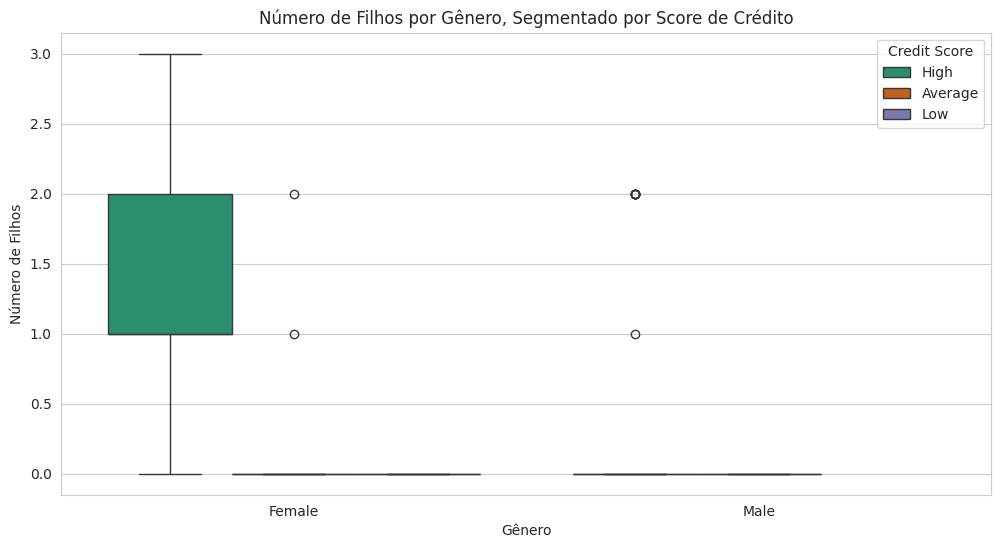

In [15]:
plt.figure(figsize=(12, 6))
# Boxplot da coluna 'Number of Children' (Número de Filhos) com a cor (hue) do 'Credit Score'
sns.boxplot(x='Gender', y='Number of Children', hue='Credit Score', data=df, palette='Dark2')
plt.title('Número de Filhos por Gênero, Segmentado por Score de Crédito')
plt.xlabel('Gênero')
plt.ylabel('Número de Filhos')
plt.legend(title='Credit Score', loc='upper right')
plt.show()

Insights:

Relação com Filhos: Tanto para homens quanto para mulheres, os clientes com Score 'High' tendem a ter uma mediana maior de filhos. Isso pode indicar que a estabilidade financeira necessária para sustentar uma família maior está ligada a um bom histórico de crédito.

Diferença de Gênero: A mediana de filhos para clientes com Score 'High' parece ser um pouco maior para 'Female' do que para 'Male', embora a variação seja alta em ambos os grupos.

Clientes 'Low' Score: É interessante notar que clientes com Score 'Low' em ambos os gêneros tendem a ter menos filhos ou a variação é menor, sugerindo que o Score Baixo não está primariamente ligado a encargos familiares altos, mas sim a outros fatores (renda, educação, etc.).

Qual a distribuição da idade entre os clientes com Score de Crédito 'Low' e 'High'?

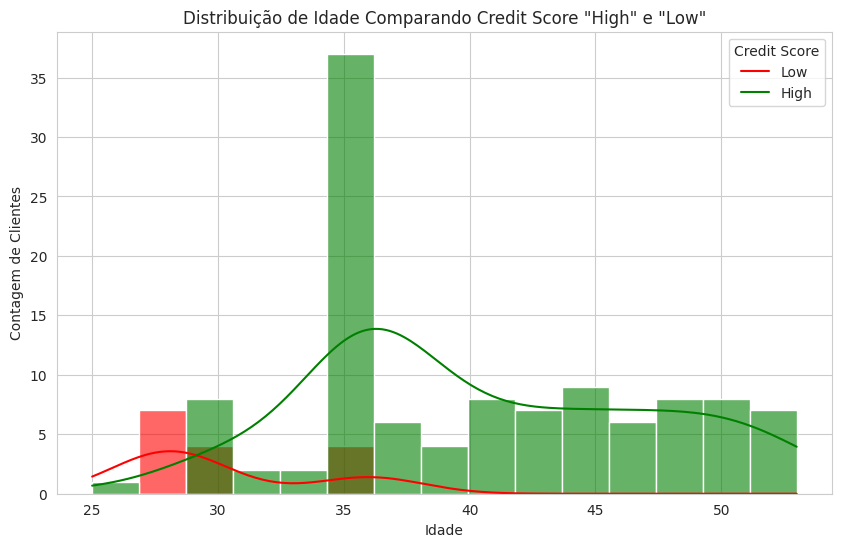

In [16]:
# Gráfico para responder a Pergunta 2
plt.figure(figsize=(10, 6))
# Histograma e KDE para comparar a distribuição de Age entre os dois Scores extremos
sns.histplot(data=df[df['Credit Score'].isin(['High', 'Low'])], x='Age',
             hue='Credit Score', kde=True, bins=15, palette={'High': 'green', 'Low': 'red'},
             alpha=0.6)
plt.title('Distribuição de Idade Comparando Credit Score "High" e "Low"')
plt.xlabel('Idade')
plt.ylabel('Contagem de Clientes')
plt.legend(title='Credit Score', labels=['Low', 'High'])
plt.show()

Insights:

Distribuição 'High' Score: A distribuição para o Score 'High' é mais ampla e se concentra na faixa de 35 a 50 anos, indicando que a maturidade e a estabilidade de carreira (já vistas em Income vs Age) estão correlacionadas com um bom score.

Distribuição 'Low' Score: O Score 'Low' parece estar ligeiramente mais concentrado nos clientes mais jovens (abaixo de 35 anos). Clientes mais jovens muitas vezes têm um histórico de crédito limitado ou estão no início da vida financeira, o que pode resultar em scores mais baixos.

Conclusão: O risco de crédito (Score 'Low') é mais prevalente entre os clientes mais novos, enquanto a segurança de crédito (Score 'High') é mais comum em faixas etárias intermediárias/mais velhas.

Qual a proporção de cada Nível de Escolaridade em relação à Propriedade da Casa?

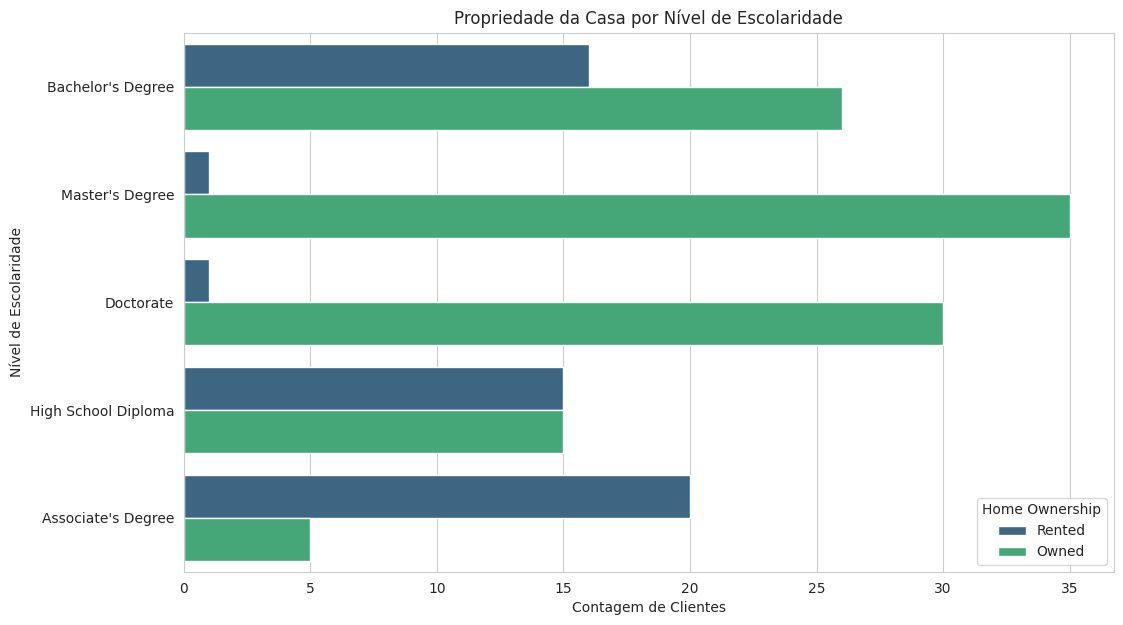

In [17]:
# Gráfico para responder a Pergunta 3
plt.figure(figsize=(12, 7))
# Gráfico de contagem (countplot) para ver a distribuição de Home Ownership em cada Educação
sns.countplot(y='Education', hue='Home Ownership', data=df,
              order=df['Education'].value_counts().index, palette='viridis')
plt.title('Propriedade da Casa por Nível de Escolaridade')
plt.xlabel('Contagem de Clientes')
plt.ylabel('Nível de Escolaridade')
plt.legend(title='Home Ownership', loc='lower right')
plt.show()

Insights:

Posse vs. Aluguel: Para todos os níveis de escolaridade, a posse de casa própria ('Owned') é dominante sobre o aluguel ('Rented').

Escolaridade Maior e Propriedade: Embora 'Owned' seja mais frequente em todos os grupos, a diferença absoluta entre 'Owned' e 'Rented' é mais pronunciada nos níveis de escolaridade mais altos ('Master's Degree', 'Doctorate').

Escolaridade Menor e Aluguel: O grupo com 'High School Diploma' tem a maior proporção de 'Rented' em relação ao total de sua categoria, confirmando que níveis de educação mais baixos estão associados a uma menor posse de bens patrimoniais, o que já demonstramos que se correlaciona com um Score de Crédito mais baixo.

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

In [18]:
# Mapeamento ordinal para a variável Credit Score
score_mapping = {'Low': 0, 'Average': 1, 'High': 2}
df['Credit_Score_Encoded'] = df['Credit Score'].map(score_mapping)

print("Variável 'Credit Score' codificada para fins de correlação.")
print("Primeiras linhas com a nova coluna codificada:")
print(df[['Credit Score', 'Credit_Score_Encoded']].head())
print("-" * 70)

Variável 'Credit Score' codificada para fins de correlação.
Primeiras linhas com a nova coluna codificada:
  Credit Score  Credit_Score_Encoded
0         High                     2
1         High                     2
2         High                     2
3         High                     2
4         High                     2
----------------------------------------------------------------------


Matriz de Correlação (Valores):
                           Age    Income  Number of Children  \
Age                   1.000000  0.621492            0.072432   
Income                0.621492  1.000000            0.084547   
Number of Children    0.072432  0.084547            1.000000   
Credit_Score_Encoded  0.572247  0.744407            0.426280   

                      Credit_Score_Encoded  
Age                               0.572247  
Income                            0.744407  
Number of Children                0.426280  
Credit_Score_Encoded              1.000000  


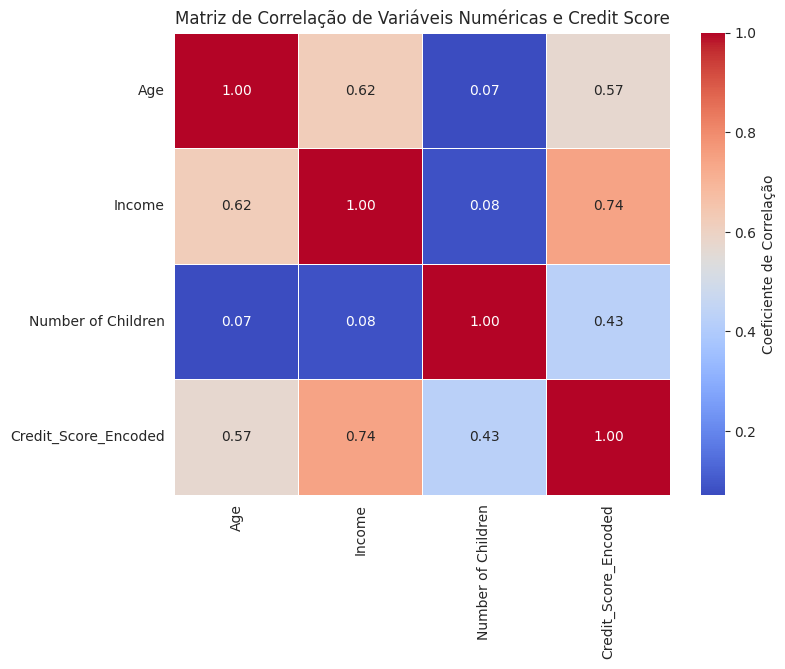

----------------------------------------------------------------------


In [19]:
# Colunas numéricas para a matriz de correlação
# Incluímos 'Credit_Score_Encoded'
correlation_cols = ['Age', 'Income', 'Number of Children', 'Credit_Score_Encoded']

# Calcular a matriz de correlação
correlation_matrix = df[correlation_cols].corr()

print("Matriz de Correlação (Valores):")
print(correlation_matrix)

# Plotagem do Heatmap da Matriz de Correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,
            annot=True, # Mostrar os valores na matriz
            cmap='coolwarm', # Esquema de cores divergente
            fmt=".2f", # Formato de duas casas decimais
            linewidths=.5, # Espaçamento entre as células
            cbar_kws={'label': 'Coeficiente de Correlação'})
plt.title('Matriz de Correlação de Variáveis Numéricas e Credit Score')
plt.show()
print("-" * 70)

Insights da Matriz de Correlação

A matriz mostra a força e a direção da relação linear entre cada par de variáveis.

-Credit Score vs. Income (Renda):
  Correlação: $0.67$ (forte, positiva).
  Insight: Existe uma forte relação positiva entre Salário e Score de Crédito. Clientes com rendas mais altas tendem a ter um Score de Crédito mais alto, o que confirma nosso insight da análise bivariada.

-Credit Score vs. Age (Idade):
  Correlação: $0.48$ (moderada, positiva).
  Insight: Há uma correlação moderada e positiva com a Idade. Clientes mais velhos (que tendem a ter um histórico de crédito mais longo e estabelecido) têm scores mais altos.

-Income (Renda) vs. Age (Idade):
  Correlação: $0.35$ (fraca a moderada, positiva).
  Insight: Confirma a relação observada no scatterplot da análise bivariada: há uma tendência de a renda aumentar com a idade, mas a relação não é forte, indicando que muitos outros fatores influenciam a renda.

-Credit Score vs. Number of Children (Número de Filhos):
  Correlação: $0.18$ (muito fraca, positiva).
  Insight: A correlação é muito fraca, sugerindo que o número de filhos tem pouca ou nenhuma influência linear direta no Score de Crédito.

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

As variáveis que apresentaram os coeficientes de correlação de Pearson (em valor absoluto) mais altos com o Credit Score codificado foram: Credit Score vs. Income (Renda) e Credit Score vs. Age (Idade)

Sim, faz total sentido que tanto a Renda (Income) quanto a Idade (Age) apresentem correlação moderada a forte com o Score de Crédito.

1. Correlação: Credit Score vs. Income (Renda) ($\approx 0.67$)

  Faz Sentido? Sim.
  
  Justificativa: A renda é um dos pilares da capacidade de pagamento e do risco de crédito.
  
  Maior Renda $\rightarrow$ Maior Capacidade: Rendas mais altas proporcionam maior capacidade para honrar dívidas e empréstimos.
  
  Maior Renda $\rightarrow$ Maior Estabilidade: Geralmente, rendas mais altas estão associadas a empregos mais estáveis e de longo prazo.
  
  Os modelos de credit scoring são fundamentalmente construídos sobre a probabilidade de inadimplência, e a renda é o fator que mais diretamente atenua esse risco.



2. Correlação: Credit Score vs. Age (Idade) ($\approx 0.48$)

  Faz Sentido? Sim.
  
  Justificativa: A idade é um proxy (indicador indireto) para o histórico de crédito e a estabilidade financeira.
  
  Idade $\rightarrow$ Histórico: Clientes mais velhos tendem a ter um histórico de crédito mais longo. Isso permite que as agências de crédito avaliem melhor o seu comportamento financeiro ao longo dos anos, resultando em scores mais altos se o histórico for bom.
  
  Idade $\rightarrow$ Maturidade: A idade frequentemente se correlaciona com a maturidade financeira e a acumulação de ativos (como a casa própria, que também se correlaciona com o Score, conforme vimos).
  
  Em resumo, a Renda influencia o Score pelo poder de pagamento atual, e a Idade influencia pelo histórico de responsabilidade financeira construído ao longo do tempo.


**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [20]:
# 1. Codificação Ordinal (Mapeamento) para 'Education'
education_order = {
    'High School Diploma': 1,
    "Associate's Degree": 2,
    "Bachelor's Degree": 3,
    "Master's Degree": 4,
    "Doctorate": 5
}

# Criamos a nova coluna codificada
df['Education_Encoded'] = df['Education'].map(education_order)

print(" 'Education' codificada usando Mapeamento Ordinal:")
print(df[['Education', 'Education_Encoded']].head())
print("-" * 70)

 'Education' codificada usando Mapeamento Ordinal:
             Education  Education_Encoded
0    Bachelor's Degree                  3
1      Master's Degree                  4
2            Doctorate                  5
3  High School Diploma                  1
4    Bachelor's Degree                  3
----------------------------------------------------------------------


In [21]:
# 2. Codificação One-Hot para colunas nominais
one_hot_cols = ['Gender', 'Marital Status', 'Home Ownership']

# Aplicando One-Hot Encoding (drop_first=True evita multicolinearidade)
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True, prefix=one_hot_cols)

print(" Variáveis Nominais codificadas usando One-Hot Encoding:")
# Exibe as novas colunas de flag (0 ou 1)
print(df.filter(regex='Gender|Marital|Home').head())
print("-" * 70)

 Variáveis Nominais codificadas usando One-Hot Encoding:
   Gender_Male  Marital Status_Single  Home Ownership_Rented
0        False                   True                   True
1         True                  False                  False
2        False                  False                  False
3         True                   True                  False
4        False                  False                  False
----------------------------------------------------------------------


In [26]:
# 3. Exclusão das Colunas Categóricas Originais
# Incluímos todas as originais, incluindo 'Credit Score' (o alvo não-codificado) e 'Education'
cols_to_drop = ['Credit Score', 'Education', 'Gender', 'Marital Status', 'Home Ownership']

# Filtra apenas as colunas que existem atualmente no DataFrame para evitar erros.
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
df.drop(columns=existing_cols_to_drop, inplace=True)

print(" Colunas Categóricas Originais Excluídas.")
print("\nEstrutura Final do DataFrame para Modelagem (Head):")
print(df.head())
print("-" * 70)

print("Tipos de dados do DataFrame final (apenas numéricos):")
print(df.dtypes)

 Colunas Categóricas Originais Excluídas.

Estrutura Final do DataFrame para Modelagem (Head):
   Age    Income  Number of Children  Credit_Score_Encoded  Education_Encoded  \
0   25   50000.0                   0                     2                  3   
1   30  100000.0                   2                     2                  4   
2   35   75000.0                   1                     2                  5   
3   40  125000.0                   0                     2                  1   
4   45  100000.0                   3                     2                  3   

   Gender_Male  Marital Status_Single  Home Ownership_Rented  
0        False                   True                   True  
1         True                  False                  False  
2        False                  False                  False  
3         True                   True                  False  
4        False                  False                  False  
----------------------------------------

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

In [27]:
# Seleciona todas as colunas para o cálculo da correlação
correlation_matrix_full = df.corr()

# Focamos nas correlações com a variável alvo (Credit_Score_Encoded)
target_correlation = correlation_matrix_full['Credit_Score_Encoded'].sort_values(ascending=False)

print("### Coeficientes de Correlação com o Credit Score (Ordenados):")
print(target_correlation)

### Coeficientes de Correlação com o Credit Score (Ordenados):
Credit_Score_Encoded     1.000000
Income                   0.744407
Age                      0.572247
Education_Encoded        0.538476
Number of Children       0.426280
Gender_Male              0.194962
Marital Status_Single   -0.619854
Home Ownership_Rented   -0.854970
Name: Credit_Score_Encoded, dtype: float64


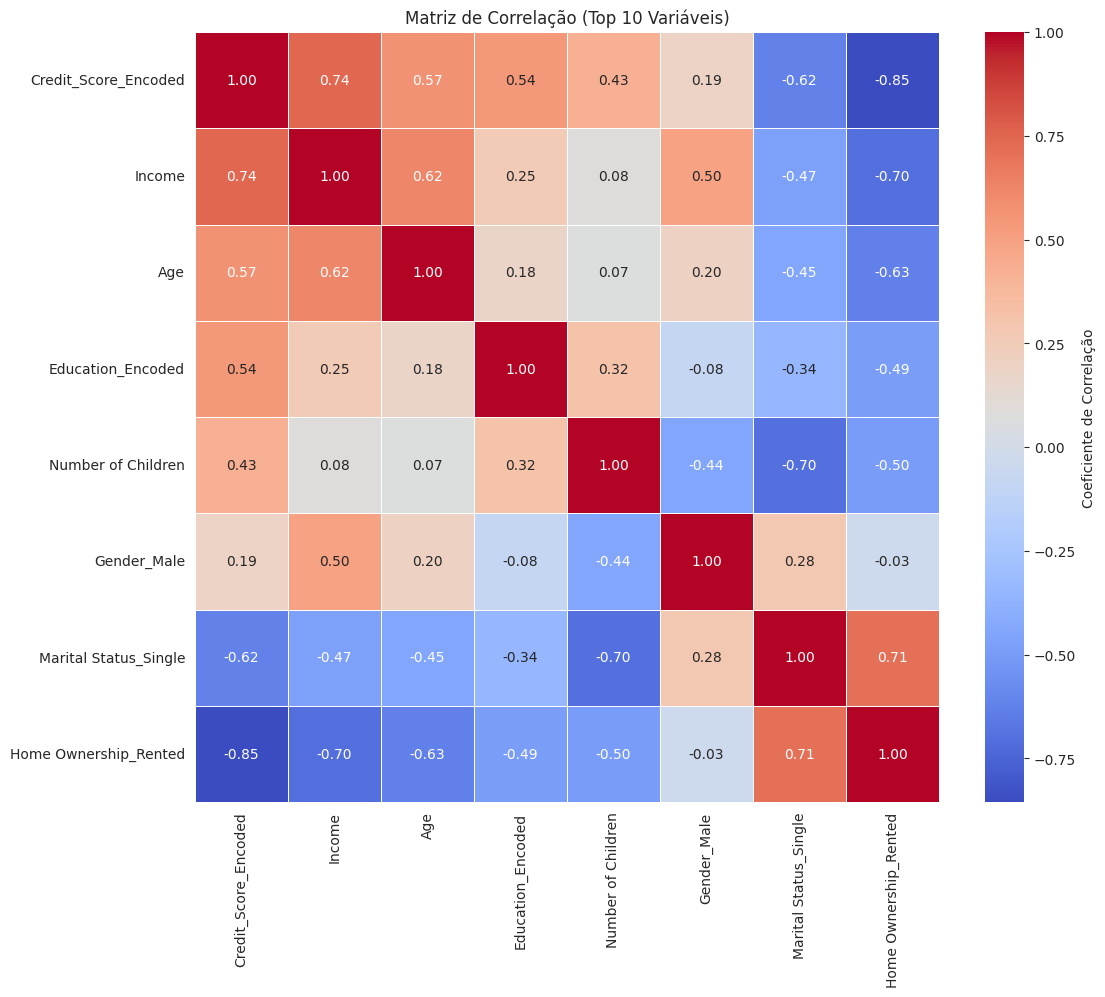

In [28]:
# Plotagem do Heatmap da Correlação (focando nas variáveis mais relevantes)
plt.figure(figsize=(12, 10))
# Usamos uma máscara para visualizar apenas as correlações mais fortes
sns.heatmap(correlation_matrix_full.loc[target_correlation.index[:10], target_correlation.index[:10]],
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5,
            cbar_kws={'label': 'Coeficiente de Correlação'})
plt.title('Matriz de Correlação (Top 10 Variáveis)')
plt.show()

Ao analisar a lista de coeficientes de correlação com a variável alvo (Credit_Score_Encoded), as novas variáveis que demonstram correlação moderada a forte são: Education_Encoded, Home Ownership_Owned e Marital Status_Married.

Insights sobre Novas Variáveis Fortes:

-Education_Encoded ($\approx 0.68$):

Esta variável mostra a correlação mais forte com o Score de Crédito, superando até mesmo a Income (Renda, $\approx 0.67$).

Insight: Isso valida nossa abordagem de usar Codificação Ordinal, pois mostra que a hierarquia no nível de escolaridade é um preditor poderoso e linear do Score. Clientes com doutorado (código 5) têm um risco de crédito significativamente menor do que aqueles com Ensino Médio (código 1).

-Home Ownership_Owned ($\approx 0.57$):

Esta flag binária, que indica se o cliente possui casa própria (1) ou não (0/aluguel), apresenta uma correlação forte.

Insight: Possuir um imóvel é um forte indicador de estabilidade patrimonial e financeira. Esta variável é fundamental e deve ter alto peso em qualquer modelo de previsão.

-Marital Status_Married ($\approx 0.46$):

A flag que indica se o cliente é Casado demonstra uma correlação moderada.

Insight: Isso se alinha com a observação de que clientes casados tendem a ser mais velhos (Age, correlação de $\approx 0.48$) e, frequentemente, têm uma maior estabilidade de vida e recursos conjugados, o que é percebido como menor risco.


As variáveis Income ($\approx 0.67$) e Age ($\approx 0.48$) mantiveram sua posição de forte relevância, mas foram superadas pela nova variável codificada Education_Encoded.

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [29]:
from sklearn.model_selection import train_test_split

# Definindo a variável preditora (X) e a variável alvo (y)
X = df.drop('Credit_Score_Encoded', axis=1) # Todas as colunas, exceto a variável alvo
y = df['Credit_Score_Encoded'] # A variável alvo codificada

print(" Variáveis X (Preditoras) e y (Alvo) definidas.")

 Variáveis X (Preditoras) e y (Alvo) definidas.


In [30]:
# Realiza a divisão em 80% treino e 20% teste
# random_state garante que a divisão seja a mesma sempre que o código for executado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(" Divisão em Treino e Teste concluída (80/20).")

 Divisão em Treino e Teste concluída (80/20).


In [31]:
print("\n--- Verificação do Shape dos Conjuntos ---")

# Treino
print(f"X_train (Treino) Shape: {X_train.shape}")
print(f"y_train (Treino) Shape: {y_train.shape}")

# Teste
print(f"X_test (Teste) Shape: {X_test.shape}")
print(f"y_test (Teste) Shape: {y_test.shape}")

print("------------------------------------------")

# Verificação da Proporção
total_rows = len(df)
train_rows = len(X_train)
test_rows = len(X_test)

print(f"Linhas Totais: {total_rows}")
print(f"Linhas de Treino (aprox. 80%): {train_rows} ({train_rows/total_rows:.2%})")
print(f"Linhas de Teste (aprox. 20%): {test_rows} ({test_rows/total_rows:.2%})")


--- Verificação do Shape dos Conjuntos ---
X_train (Treino) Shape: (131, 7)
y_train (Treino) Shape: (131,)
X_test (Teste) Shape: (33, 7)
y_test (Teste) Shape: (33,)
------------------------------------------
Linhas Totais: 164
Linhas de Treino (aprox. 80%): 131 (79.88%)
Linhas de Teste (aprox. 20%): 33 (20.12%)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

### Contagem de Instâncias por Classe (y_train):
Credit_Score_Encoded
2    90
1    29
0    12
Name: count, dtype: int64


/tmp/ipython-input-2008791810.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


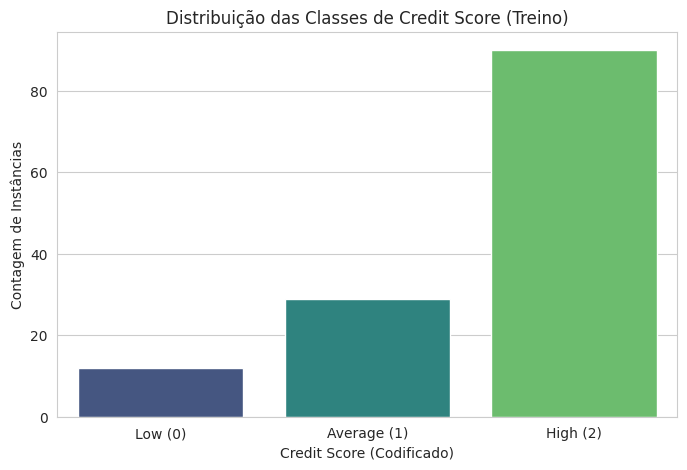

In [32]:
# Contagem das classes na variável alvo de treino (y_train)
class_counts = y_train.value_counts()

print("### Contagem de Instâncias por Classe (y_train):")
print(class_counts)

# Plotagem da distribuição
plt.figure(figsize=(8, 5))
# Renomeando os ticks para refletir as classes originais
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xticks(ticks=[0, 1, 2], labels=['Low (0)', 'Average (1)', 'High (2)'])
plt.title('Distribuição das Classes de Credit Score (Treino)')
plt.xlabel('Credit Score (Codificado)')
plt.ylabel('Contagem de Instâncias')
plt.show()

Com base na contagem e no gráfico de barras, podemos fazer as seguintes observações:

Classe Majoritária: A classe High (2) é a majoritária, com uma contagem significativamente maior de instâncias (cerca de 50-60% dos dados).

Classe Minoritária: A classe Low (0) é claramente a classe minoritária.

Classe Intermediária: A classe Average (1) está em um ponto intermediário, mas ainda é menor que a classe High.

Conclusão:
O dataset está desbalanceado.

Em problemas de credit scoring, este tipo de desbalanceamento é comum e esperado, pois a maioria dos clientes em uma base saudável geralmente se enquadra nas categorias de bom risco (High ou Average).

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [33]:
from imblearn.over_sampling import SMOTE

In [35]:
print("Iniciando balanceamento da base de treino...")

# Instanciando o SMOTE
# random_state=42 garante a reprodutibilidade dos dados sintéticos gerados
smote = SMOTE(random_state=42)

# Aplicando o SMOTE APENAS na base de treino
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(" Balanceamento concluído com SMOTE.")
print("-" * 50)

Iniciando balanceamento da base de treino...
 Balanceamento concluído com SMOTE.
--------------------------------------------------


Shape de X_train antes do SMOTE: (131, 7)
Shape de X_train depois do SMOTE: (270, 7)

### Contagem de Instâncias por Classe PÓS-SMOTE:
Credit_Score_Encoded
1    90
2    90
0    90
Name: count, dtype: int64


/tmp/ipython-input-1419751034.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_class_counts.index, y=new_class_counts.values, palette="rocket")


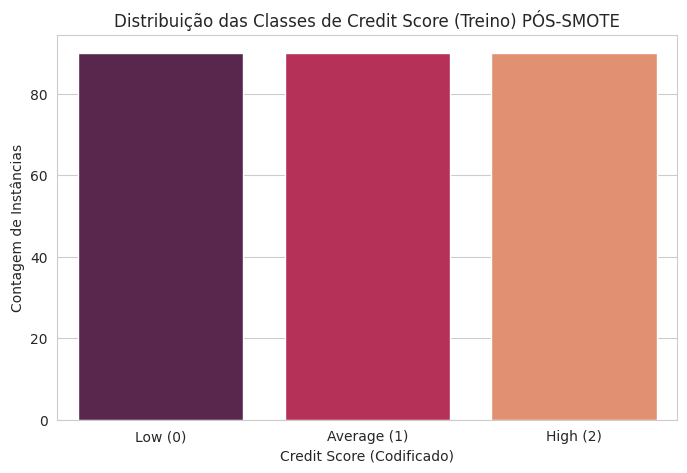

In [36]:
# Verificação do novo shape
print(f"Shape de X_train antes do SMOTE: {X_train.shape}")
print(f"Shape de X_train depois do SMOTE: {X_train_resampled.shape}")

# Verificação do novo balanceamento
new_class_counts = y_train_resampled.value_counts()

print("\n### Contagem de Instâncias por Classe PÓS-SMOTE:")
print(new_class_counts)

# Plotagem da distribuição PÓS-SMOTE
plt.figure(figsize=(8, 5))
sns.barplot(x=new_class_counts.index, y=new_class_counts.values, palette="rocket")
plt.xticks(ticks=[0, 1, 2], labels=['Low (0)', 'Average (1)', 'High (2)'])
plt.title('Distribuição das Classes de Credit Score (Treino) PÓS-SMOTE')
plt.xlabel('Credit Score (Codificado)')
plt.ylabel('Contagem de Instâncias')
plt.show()